<p align="center">
    <img src="https://github.com/jessepisel/energy_analytics/blob/master/EA_logo.jpg?raw=true" width="220" height="240" />

</p>

# Clustering

## Freshman Research Initiative Energy Analytics CS 309

#### Jesse Pisel, Assistant Professor of Practice, University of Texas at Austin
**[Twitter](http://twitter.com/geologyjesse)** | **[GitHub](https://github.com/jessepisel)** | **[GoogleScholar](https://scholar.google.com/citations?user=Z4JzYgIAAAAJ&hl=en&oi=ao)** | **[LinkedIn](https://www.linkedin.com/in/jesse-pisel-70519430/)**

Let's import `pandas` and `numpy` for data structures, and `seaborn` and `matplotlib` for viz. We also want to import `scooby` so we can see what version of `sklearn` and `seaborn` we have installed

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scooby
import seaborn as sns

sns.set()  # make it pretty
import sklearn  # for label encoding

%matplotlib inline

Run a `scooby` report to see what versions we have installed

In [2]:
scooby.Report(additional=[sklearn, sns])

--------------------------------------------------------------------------------
  Date: Wed Jun 03 10:59:58 2020 Central Daylight Time

           Windows : OS
                 8 : CPU(s)
             AMD64 : Machine
             64bit : Architecture
           15.9 GB : RAM
           Jupyter : Environment

  Python 3.6.7 (default, Jul  2 2019, 02:21:41) [MSC v.1900 64 bit (AMD64)]

            0.21.3 : sklearn
             0.9.0 : seaborn
            1.17.0 : numpy
             1.3.1 : scipy
             7.8.0 : IPython
             3.1.1 : matplotlib
             0.4.3 : scooby

  Intel(R) Math Kernel Library Version 2019.0.4 Product Build 20190411 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------

Read in the data with `pandas` and take a look at how it is structured

In [3]:
data = pd.read_csv(r"well_data.csv")  # read it in
data.head()

,DEPT,AHT10,AHT20,AHT30,AHT60,AHT90,AHTCO60,AHTCO90,DPHZ,DSOZ,...,ITT,NPOR,PEFZ,RSOZ,RXOZ,SDEV,SP,SPHI,RHOZ,TOP
0,4647.0,7.9474,7.7832,7.8743,8.1251,8.2127,123.0750,121.7627,0.0779,0.5004,...,0.0000,0.6244,4.3179,0.1670,6.0978,3.2970,0.0000,0.2969,2.5215,NELCHINA
1,4646.5,7.9475,7.7832,7.8747,8.1248,8.2141,123.0797,121.7420,0.0850,0.4983,...,0.0001,0.6244,4.4494,0.1669,6.0968,3.2970,0.3125,0.2969,2.5097,NELCHINA
2,4646.0,7.9477,7.7831,7.8750,8.1245,8.2156,123.0838,121.7204,0.0990,0.4944,...,0.0001,0.6241,4.6198,0.1668,6.0968,3.2970,0.6875,0.2969,2.4866,NELCHINA
3,4645.5,7.9477,7.7831,7.8753,8.1243,8.2171,123.0874,121.6980,0.1127,0.4903,...,0.0002,0.6244,4.8119,0.1669,6.0967,3.2976,1.3125,0.2969,2.4640,NELCHINA
4,4645.0,7.9478,7.7831,7.8756,8.1242,8.2186,123.0886,121.6747,0.1324,0.4825,...,0.0002,0.6244,5.0141,0.1669,6.0967,3.2979,0.5000,0.2969,2.4315,NELCHINA


Now we want to make a scatter plot of `DT` and `AHTCO90` to see how sonic velocity is related to long conductivity

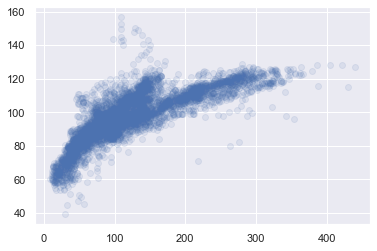

In [4]:
plt.scatter(data.AHTCO90, data.DT, alpha=0.1)

Looks good, but let's see if we can separate what looks like two different groups of data. What if we color it by depth?

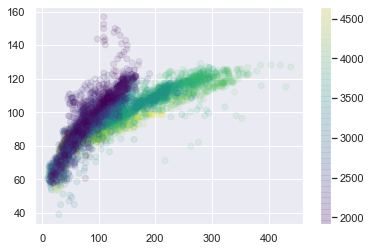

In [5]:
plt.scatter(data.AHTCO90, data.DT, c=data.DEPT, cmap="viridis", alpha=0.1)
plt.colorbar()

That looks like the shallow data samples have a different relationship than the deeper samples. We should investigate this further. But first let's go ahead and get rid of the qualitative `TOP` data

In [6]:
clean_data = data.drop("TOP", axis=1)

Next we want to scale our features, and assign our two features we are going to use in our clustering

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = pd.DataFrame(
    scaler.fit_transform(clean_data.values),
    columns=clean_data.columns,
    index=clean_data.index,
)
X = scaled_data[["DT", "AHTCO90"]]

We will start with `KMeans` clustering and see how it does. We just need to import it and fit it ot our dataset

In [8]:
from sklearn.cluster import KMeans

In [9]:
cluster = KMeans(n_clusters=3, n_init=100, init="random", random_state=86)
cluster.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=100, n_jobs=None, precompute_distances='auto', random_state=86,
       tol=0.0001, verbose=0)

After we fit our `KMeans` algorithm, we have labels for each point in the dataset. We want to add this to our dataframe 

In [10]:
X = X.assign(Label=cluster.labels_)

In [11]:
X.head()

,DT,AHTCO90,Label
0,0.506432,0.261828,0
1,0.506432,0.261780,0
2,0.506432,0.261730,0
3,0.506432,0.261678,0
4,0.506432,0.261624,0


Let's look at the cluster labels and see how `KMeans` did with just two features.

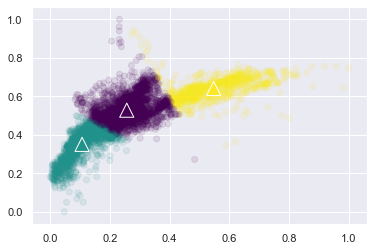

In [12]:
plt.scatter(
    X.AHTCO90,
    X.DT,
    c=X.Label,
    cmap="viridis",
    alpha=0.1,
)
centers = np.sort(cluster.cluster_centers_)
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="^",
    s=200,
    c=sorted(X.Label.unique()),
    cmap="viridis",
    edgecolors="white",
)

That seems to be a let down with how it partitioned our our data in two dimensions. What if we try `DBSCAN` clustering?

In [13]:
from sklearn.cluster import DBSCAN

In [14]:
db = DBSCAN(eps=0.1, algorithm="auto", min_samples=15)
db.fit(X)

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=15, n_jobs=None, p=None)

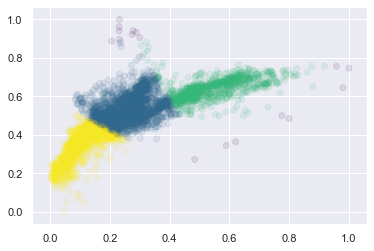

In [15]:
X = X.assign(DBLabels=db.labels_)
plt.scatter(
    X.AHTCO90,
    X.DT,
    c=X.DBLabels,
    cmap="viridis",
    alpha=0.1,
)

Still disappointing to say the least. Let's get rid of our labels and bring in all the different features we have available in the dataset

In [16]:
X = scaled_data

In [17]:
X.head()

,DEPT,AHT10,AHT20,AHT30,AHT60,AHT90,AHTCO60,AHTCO90,DPHZ,DSOZ,...,HTEM,ITT,NPOR,PEFZ,RSOZ,RXOZ,SDEV,SP,SPHI,RHOZ
0,1.000000,0.034344,0.033567,0.050333,0.053391,0.055592,0.279709,0.261828,0.886267,0.495544,...,0.836363,0.000000,1.00000,0.255744,0.487449,0.001495,0.447014,0.294596,0.506414,0.113761
1,0.999817,0.034344,0.033567,0.050337,0.053388,0.055605,0.279721,0.261780,0.891194,0.493464,...,0.836363,0.000377,1.00000,0.272968,0.487157,0.001494,0.447014,0.296627,0.506414,0.108798
2,0.999634,0.034345,0.033566,0.050340,0.053385,0.055619,0.279731,0.261730,0.900909,0.489602,...,0.836363,0.000377,0.99949,0.295287,0.486865,0.001494,0.447014,0.299065,0.506414,0.099083
3,0.999452,0.034345,0.033566,0.050342,0.053383,0.055633,0.279740,0.261678,0.910416,0.485542,...,0.836363,0.000754,1.00000,0.320449,0.487157,0.001494,0.447096,0.303129,0.506414,0.089579
4,0.999269,0.034346,0.033566,0.050345,0.053383,0.055647,0.279743,0.261624,0.924086,0.477817,...,0.836363,0.000754,1.00000,0.346934,0.487157,0.001494,0.447137,0.297846,0.506414,0.075911


With 27 different features available, let's go back to `KMeans` clustering and see how it does with 6 clusters

In [18]:
cluster = KMeans(n_clusters=6, n_init=100, init="random", random_state=86)
cluster.fit(X)
scaled_data["Label"] = cluster.labels_

This seems to be a bit more reasonable. We have some overlapping clusters, and we see a couple of clusters with different slopes like we noticed earlier on. 

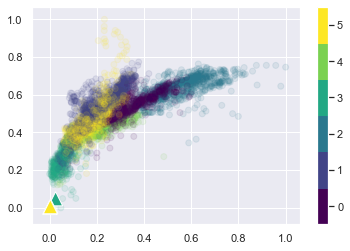

In [19]:
plt.scatter(
    scaled_data.AHTCO90,
    scaled_data.DT,
    c=scaled_data.Label,
    cmap="viridis",
    alpha=0.1,
)
centers = np.sort(cluster.cluster_centers_)
cluster_numbers = sorted(scaled_data.Label.unique())
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="^",
    s=200,
    c=cluster_numbers,
    cmap=plt.cm.get_cmap("viridis", len(cluster_numbers)),
    edgecolors="white",
)
plt.colorbar(ticks=cluster_numbers)
plt.clim(-0.5, len(cluster_numbers) - 0.5)

What if we try this with `DBSCAN`, how do you think it will do?

In [20]:
db = DBSCAN(eps=0.1, algorithm="auto", min_samples=15)
db.fit(X)

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=15, n_jobs=None, p=None)

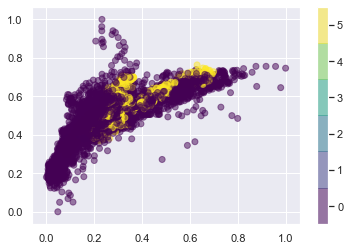

In [21]:
scaled_data["DBLabels"] = db.labels_
plt.scatter(
    scaled_data.AHTCO90,
    scaled_data.DT,
    c=scaled_data.DBLabels,
    cmap=plt.cm.get_cmap("viridis", len(cluster_numbers)),
    alpha=0.5,
)
plt.colorbar(ticks=cluster_numbers)
plt.clim(-0.5, len(cluster_numbers) - 0.5)